In [1]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

#### Class Development

In [2]:
class MyProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var = 3,
                         n_obj = 2,
                         n_ieq_constr = 2,
                         xl = np.array([-10,-10,-10]),
                         xu = np.array([10,10,10]), 
                         )
    def _evaluate(self, x, out, *args, **kwargs):
        # x represents the array of decision variables
        # out will collect and contain the objective functions, decision variables and constraints

        # Define objective functions
        f1 = (x[0]**2 + x[1]**2 +x[2]**2)
        f2 = -(x[0]-1)**2 - (x[1]-1)**2 - (x[2]-1)**2

        # We need to make both f1 and f2 have the same goal i.e. both min or maximize
        # in current problem we min f1 and max f2
        # let us change f2 to a min bojective by multiplying it by -1
        f2 = -1*f2

        # Define constraints
        g1 = x[0] +x[1] + x[2] - 1
        g2 = -3*x[0] + x[1] + x[2] - 4

        # Store the outputs of optimization
        out['F'] = [f1, f2]
        out['G'] = [g1, g2]
        

        #return super()._evaluate(x, out, *args, **kwargs)

problem = MyProblem()

#### Initializing an Algorithm

NSGA-II = Non-dominated Sorting Genetic Algorithm

In [3]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX # Simulated Binary Cross-over
from pymoo.operators.mutation.pm import PM # Polynomial mutation

In [4]:
algorithm = NSGA2(
    pop_size=50, # hyperparameter
    n_offsprings=10,
    sampling=FloatRandomSampling(),
    crossover=SBX(
        prob_var=0.9, # there is a 90% chance that crossover will be performed
        eta=20, # controls the spread of the crossover - high value implies larger spread i.e. potentially exploring a larger portion of the solution space
    ),
    mutation=PM(
        eta=25, # controls the mutation rate i.e. higher value means smaller mutation and vice-versa - 25 is moderate value
    ),
    eliminate_duplicates = True, # Specifies if duplicate solutions should be eliminated or not. True = population contans unique solution
)

Define termination criteria i.e. when should the optimization process stop based on certain conditions.
For example, terminating criteria could be the maximim number of generations.
Different types termination criteria that are available in pymoo - https://pymoo.org/interface/termination.html

Here we will use: Number of Generations (‘n_gen’) - number of generations / iterations can be limited.

In [5]:
from pymoo.termination import get_termination
termination = get_termination("n_gen",100) # STop after 100 iterations or generation

##### Optimization Process

In [6]:
from pymoo.optimize import minimize

res = minimize(
    problem=problem,
    algorithm=algorithm,
    termination=termination, 
    seed=7, # for reproducibility
    save_history=True,
    verbose=True,
)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       50 |      1 |  0.000000E+00 |  7.0400185790 |             - |             -
     2 |       60 |      1 |  0.000000E+00 |  3.6065063788 |  0.000000E+00 |             f
     3 |       70 |      1 |  0.000000E+00 |  2.0100091797 |  0.000000E+00 |             f
     4 |       80 |      1 |  0.000000E+00 |  1.1042622269 |  0.000000E+00 |             f
     5 |       90 |      1 |  0.000000E+00 |  0.4621926217 |  4.4094253350 |         ideal
     6 |      100 |      1 |  0.000000E+00 |  0.0353665820 |  0.000000E+00 |             f
     7 |      110 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     8 |      120 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     9 |      130 |      1 |  0.000000E+00 |  0.000000E+00 |  4.8745946330 |         ideal
    10 |      140 |      2 |  0.000000E+00 |  0.000000E+00 |  1.0000000000 |         ideal

- n_gen = number of generations
- n_eval = number of times the optimization algorithm has interacted with the objective & constraint functions
- n_nds = number of non-dominated solutions (pareto solution)
- cv_min = minimum constraint violation value (how much a solution violates a defined constraint, lower=better) among all solutions in the current generation
- cv_avg = average constraint violation value (how much a solution violates a defined constraint, lower=better) among all solutions in the current generation
- eps = epsilon indicator which is the metric used to assess the quality of the solution found. It measures the distance between the truepareto front and the solution obtained. Smaller values indicate better solution quality.
- indicator = type of performance metric used to assess the quality of the solution at eah generation (to be explained further)

##### Results and Visualization

In [10]:
# X is the decision variable vector
X = res.X
print(X.shape)

(48, 3)


X contains an array of 3 different cloumns and 100 generations. For each column you can see x1, x2 and x3

In [9]:
print(X)

[[ 0.45382909  0.31573872  0.16213091]
 [ 0.00949171  0.08698893 -0.01964132]
 [ 0.13317739  0.25112956  0.37593114]
 [ 0.12334175  0.24778024  0.37391247]
 [ 0.01508771  0.08679227 -0.01964132]
 [ 0.14028947  0.25329802  0.37595643]
 [ 0.20212229  0.09241361  0.19576763]
 [ 0.14903562  0.08829377  0.15979465]
 [ 0.44644454  0.31403931  0.16501188]
 [ 0.01316969  0.09153982  0.16305969]
 [ 0.20113289  0.25691716  0.42781328]
 [ 0.12511595  0.09727764  0.18748335]
 [ 0.00377228  0.0823999   0.16829847]
 [ 0.12546221  0.44090097  0.39121125]
 [ 0.2021486   0.26471152  0.43030333]
 [ 0.20716684  0.2471432   0.48915139]
 [ 0.20195044  0.26796143  0.43634079]
 [ 0.14789945  0.08673457  0.14690331]
 [ 0.14698561  0.32538344  0.36114895]
 [ 0.39273917  0.31576731  0.15916864]
 [ 0.13992457  0.08587299  0.01551698]
 [ 0.14897778  0.26486627  0.37121172]
 [ 0.13323523  0.07455706  0.16451408]
 [ 0.139815    0.25973757  0.37791477]
 [ 0.13301213  0.2493432   0.37620298]
 [ 0.14426843  0.14561337

In [11]:
F = res.F
print(F.shape)

(48, 2)


F contains the values of the objective function for each generation

In [12]:
print(F)

[[3.31938210e-01 1.46854078e+00]
 [8.04294749e-03 2.85436431e+00]
 [2.22126498e-01 1.70165031e+00]
 [2.16418770e-01 1.72634984e+00]
 [8.14631943e-03 2.84366898e+00]
 [2.25184256e-01 1.68609642e+00]
 [8.77186611e-02 2.10711160e+00]
 [5.55417376e-02 2.26129365e+00]
 [3.25162334e-01 1.47417088e+00]
 [3.51414400e-02 2.49960306e+00]
 [2.89485076e-01 1.51775839e+00]
 [6.02669466e-02 2.24051306e+00]
 [3.51283491e-02 2.52618704e+00]
 [3.63180670e-01 1.44803181e+00]
 [2.96097203e-01 1.50177030e+00]
 [3.43266944e-01 1.45634409e+00]
 [3.02980593e-01 1.49047527e+00]
 [5.09777132e-02 2.28790307e+00]
 [2.57907714e-01 1.59087172e+00]
 [2.79287705e-01 1.54393747e+00]
 [2.71938320e-02 2.54456475e+00]
 [2.30146662e-01 1.66003512e+00]
 [5.03752632e-02 2.30576253e+00]
 [2.29831408e-01 1.67489674e+00]
 [2.21392943e-01 1.70427632e+00]
 [4.37321199e-02 2.38113164e+00]
 [1.72715953e-01 1.74309373e+00]
 [1.54607423e-02 2.60959028e+00]
 [4.30203942e-02 2.38568663e+00]
 [1.09444968e-01 2.02971950e+00]
 [1.506048

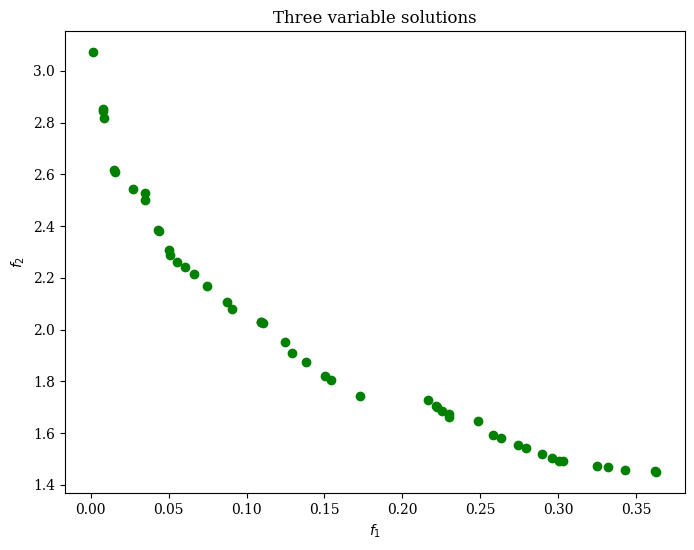

In [13]:
from pymoo.visualization.scatter import Scatter

plot = Scatter(title='Three variable solutions')
plot.add(F, color='green')
plot.show()

At this point, we want to decide which one is the optimal solution